Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [105]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [106]:
import keras
from keras.models import Sequential
from keras.layers import Dense

##Clothes recognition - dataset **Fasion MNIST**




Download dataset

In [107]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [108]:
data = np.concatenate([train_data, test_data])

In [109]:
data.shape

(70000, 28, 28)

In [110]:
label = np.concatenate([train_labels,test_labels])

In [111]:
label.shape

(70000,)

Informations about dataset

In [112]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [113]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000,))

In [114]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [115]:
train_labels[0]

9

One-hot encoding

In [116]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [117]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000, 10))

In [118]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000, 10))

In [119]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Visulization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


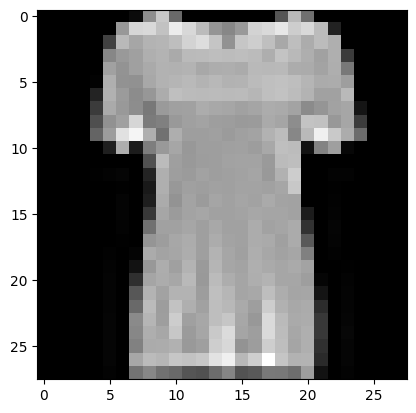

In [120]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [121]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [122]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 3s 6ms/step - loss: 7.4114 - accuracy: 0.6978 - val_loss: 1.3042 - val_accuracy: 0.7019
Epoch 2/50
375/375 [==============================] - 3s 7ms/step - loss: 0.9321 - accuracy: 0.7360 - val_loss: 0.8414 - val_accuracy: 0.7530
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 0.7104 - accuracy: 0.7692 - val_loss: 0.7129 - val_accuracy: 0.7794
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.6078 - accuracy: 0.7896 - val_loss: 0.6748 - val_accuracy: 0.7882
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.5444 - accuracy: 0.8107 - val_loss: 0.6128 - val_accuracy: 0.8058
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4887 - accuracy: 0.8275 - val_loss: 0.5403 - val_accuracy: 0.8257
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4593 - accuracy: 0.8352 - val_loss: 0.5638 - val_accuracy: 0.8132
Epoch 

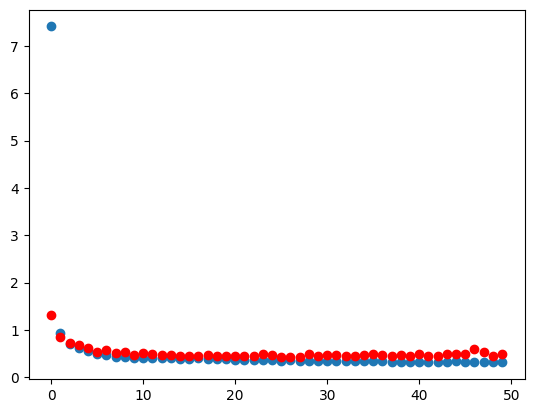

In [124]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

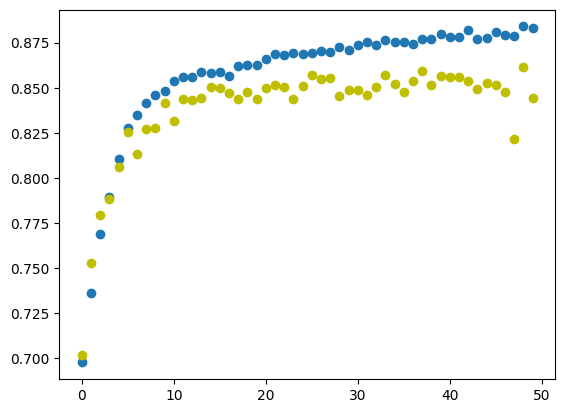

In [125]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [126]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5169681906700134
Test accuracy: 0.8378999829292297


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 51ms/step


array([[5.3179103e-01, 4.9443461e-08, 2.8912007e-07, 3.7933025e-04,
        2.4379283e-08, 5.3894745e-22, 4.6782932e-01, 0.0000000e+00,
        1.1035983e-09, 2.1506313e-38]], dtype=float32)

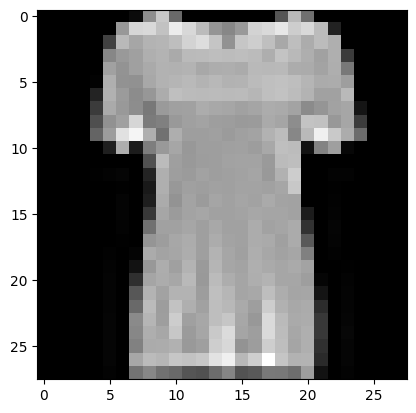

In [127]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [128]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [129]:
import keras
from keras.models import Sequential
from keras.layers import Dense

##Numbers recognition - dataset **MNIST**

Download dataset

In [130]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [131]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [132]:
data = np.concatenate([train_data, test_data])

In [133]:
data.shape

(70000, 28, 28)

In [134]:
label = np.concatenate([train_labels,test_labels])

In [135]:
label.shape

(70000,)

Informations about dataset

In [136]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [137]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000,))

In [138]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [139]:
train_labels[0]

9

One-hot encoding

In [140]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [141]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000, 10))

In [142]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000, 10))

In [143]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Visulization

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


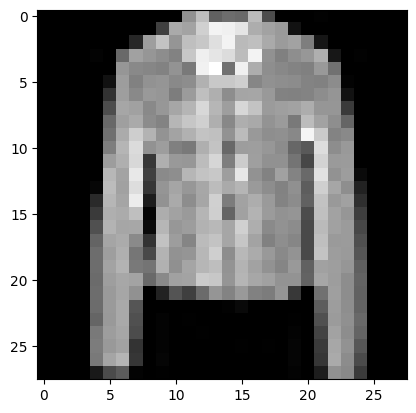

In [144]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [145]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [146]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [147]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 8.5425 - accuracy: 0.7096 - val_loss: 1.3448 - val_accuracy: 0.6915
Epoch 2/50
375/375 [==============================] - 2s 6ms/step - loss: 0.9913 - accuracy: 0.7292 - val_loss: 0.8693 - val_accuracy: 0.7464
Epoch 3/50
375/375 [==============================] - 2s 7ms/step - loss: 0.7210 - accuracy: 0.7783 - val_loss: 0.7194 - val_accuracy: 0.7875
Epoch 4/50
375/375 [==============================] - 2s 4ms/step - loss: 0.6102 - accuracy: 0.8011 - val_loss: 0.6328 - val_accuracy: 0.7952
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.5513 - accuracy: 0.8180 - val_loss: 0.6354 - val_accuracy: 0.7998
Epoch 6/50
375/375 [==============================] - 2s 4ms/step - loss: 0.5126 - accuracy: 0.8246 - val_loss: 0.5897 - val_accuracy: 0.8227
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4761 - accuracy: 0.8340 - val_loss: 0.5684 - val_accuracy: 0.8143
Epoch 

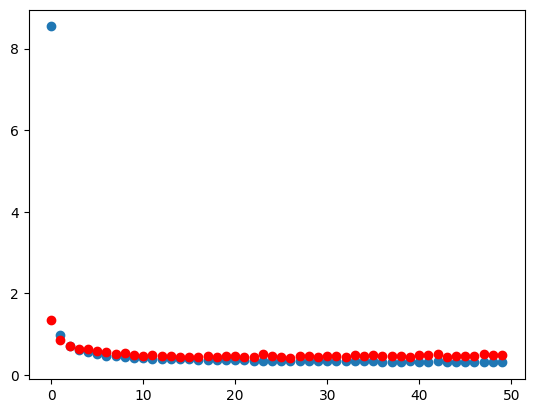

In [148]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

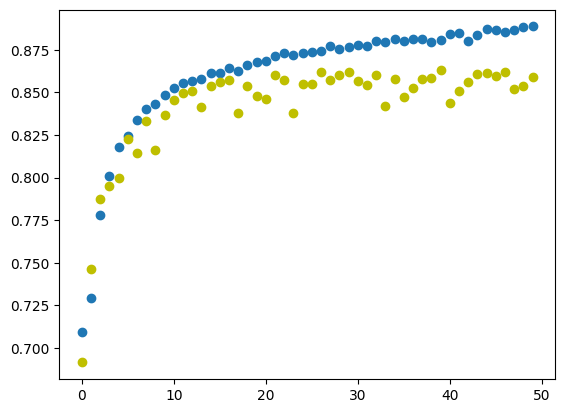

In [149]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [150]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.509166955947876
Test accuracy: 0.8529000282287598


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 51ms/step


array([[1.7098278e-03, 8.9089546e-05, 1.3766566e-01, 1.4066697e-03,
        7.6899230e-01, 4.5096906e-28, 9.0136059e-02, 0.0000000e+00,
        2.6587446e-07, 8.2854803e-36]], dtype=float32)

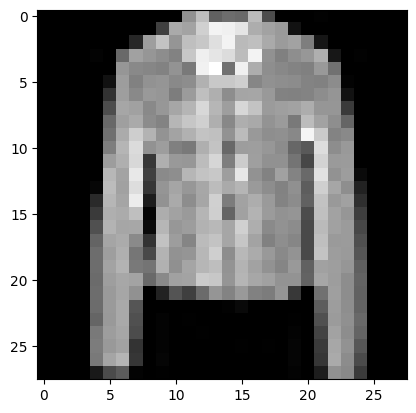

In [151]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = test_data[img_index].reshape(-1,784)

model.predict(picture)

# **Regularyzacja** - metoda 1

Zwiększamy zbiór treningowy z **60000** do **65000** (20% to zbiór walidacyjny)

In [152]:
test_data = data[:65000]
train_data = data[65000:]
test_labels = label[:65000]
train_labels = label[65000:]

In [153]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(65000, 28, 28) (5000, 28, 28) (65000,) (5000,)


One-hot coding

In [154]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [155]:
train_data.shape,train_labels.shape

((5000, 28, 28), (5000, 10))

In [156]:
test_data.shape,test_labels.shape

((65000, 28, 28), (65000, 10))

In [157]:
train_labels[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Visulization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


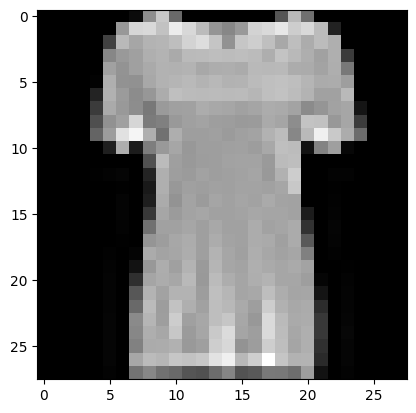

In [158]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [159]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [160]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [161]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
32/32 [==============================] - 1s 11ms/step - loss: 48.6134 - accuracy: 0.5160 - val_loss: 13.5128 - val_accuracy: 0.6610
Epoch 2/50
32/32 [==============================] - 0s 5ms/step - loss: 10.0092 - accuracy: 0.7035 - val_loss: 8.1252 - val_accuracy: 0.7180
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 6.0523 - accuracy: 0.7322 - val_loss: 8.1392 - val_accuracy: 0.6930
Epoch 4/50
32/32 [==============================] - 0s 5ms/step - loss: 4.9141 - accuracy: 0.7523 - val_loss: 5.3332 - val_accuracy: 0.7390
Epoch 5/50
32/32 [==============================] - 0s 5ms/step - loss: 3.8216 - accuracy: 0.7717 - val_loss: 5.3640 - val_accuracy: 0.7170
Epoch 6/50
32/32 [==============================] - 0s 5ms/step - loss: 3.0280 - accuracy: 0.7837 - val_loss: 5.4981 - val_accuracy: 0.7160
Epoch 7/50
32/32 [==============================] - 0s 5ms/step - loss: 2.4920 - accuracy: 0.7915 - val_loss: 4.2869 - val_accuracy: 0.7220
Epoch 8/50
32/32

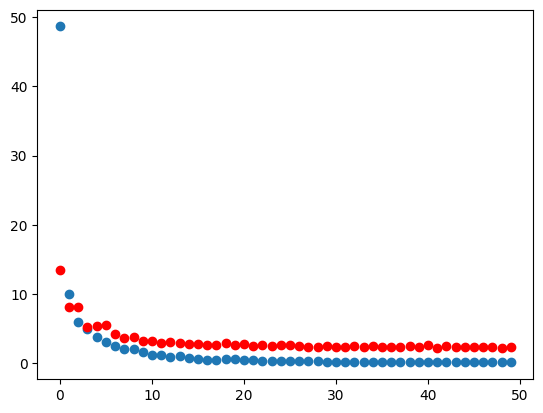

In [162]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

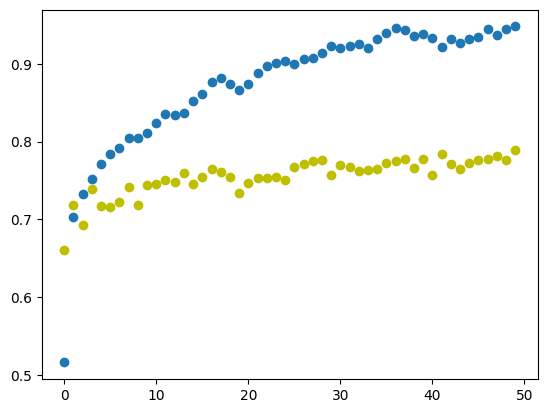

In [163]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [164]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.1894993782043457
Test accuracy: 0.7882000207901001


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 48ms/step


array([[9.9700314e-01, 1.5093416e-11, 1.2314596e-06, 6.6878658e-10,
        0.0000000e+00, 3.9279828e-09, 2.9955881e-03, 2.0454720e-26,
        2.7322981e-15, 4.6357407e-21]], dtype=float32)

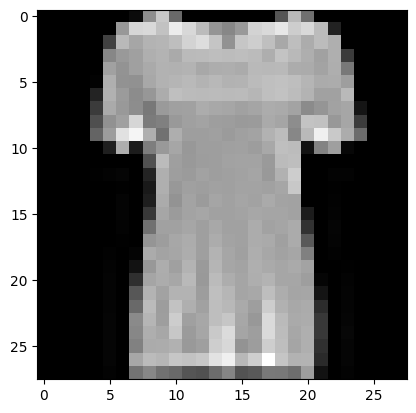

In [165]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = test_data[img_index].reshape(-1,784)

model.predict(picture)

Zwiększamy zbiór treningowy z **60000** do **68000** (20% to zbiór walidacyjny)



In [166]:
test_data = data[:68000]
train_data = data[68000:]
test_labels = label[:68000]
train_labels = label[68000:]

In [167]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(68000, 28, 28) (2000, 28, 28) (68000,) (2000,)


One-hot coding

In [168]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [169]:
train_data.shape,train_labels.shape

((2000, 28, 28), (2000, 10))

In [170]:
test_data.shape,test_labels.shape

((68000, 28, 28), (68000, 10))

In [171]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Visulization

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


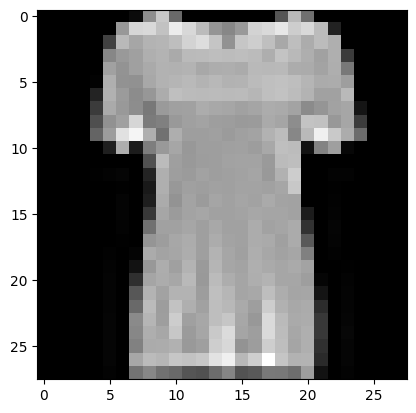

In [172]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [173]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [174]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [175]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
13/13 [==============================] - 1s 31ms/step - loss: 103.5510 - accuracy: 0.3581 - val_loss: 40.0667 - val_accuracy: 0.4725
Epoch 2/50
13/13 [==============================] - 0s 11ms/step - loss: 24.1392 - accuracy: 0.6037 - val_loss: 15.3471 - val_accuracy: 0.6750
Epoch 3/50
13/13 [==============================] - 0s 12ms/step - loss: 14.0421 - accuracy: 0.6925 - val_loss: 12.6863 - val_accuracy: 0.6750
Epoch 4/50
13/13 [==============================] - 0s 11ms/step - loss: 9.6410 - accuracy: 0.7244 - val_loss: 10.5986 - val_accuracy: 0.7175
Epoch 5/50
13/13 [==============================] - 0s 12ms/step - loss: 7.3955 - accuracy: 0.7406 - val_loss: 8.0434 - val_accuracy: 0.7450
Epoch 6/50
13/13 [==============================] - 0s 11ms/step - loss: 5.8013 - accuracy: 0.7769 - val_loss: 8.1976 - val_accuracy: 0.7050
Epoch 7/50
13/13 [==============================] - 0s 12ms/step - loss: 4.5044 - accuracy: 0.7850 - val_loss: 6.9670 - val_accuracy: 0.7450
Epoch

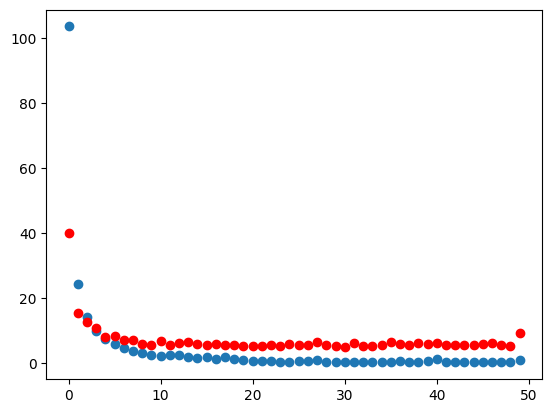

In [176]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

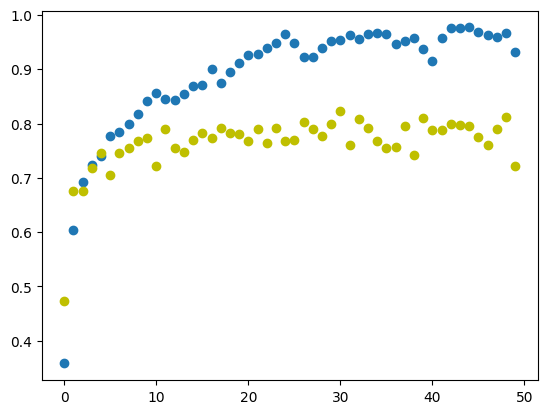

In [177]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [178]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 9.17452621459961
Test accuracy: 0.7237794399261475


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 70ms/step


array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.8871810e-21,
        0.0000000e+00, 0.0000000e+00, 1.4660929e-26, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

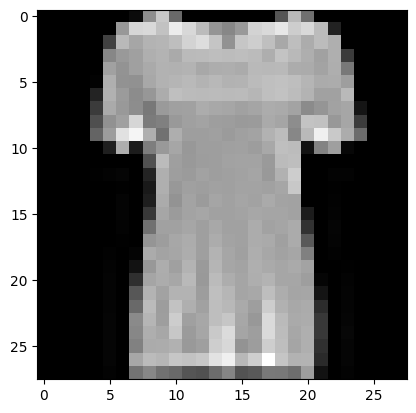

In [179]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = test_data[img_index].reshape(-1,784)

model.predict(picture)

#Opis:

batch_size = 128

epochs = 50

Zwiększony zbiór treningowy z **60000** do **68000** (20% to zbiór walidacyjny)

opt = keras.optimizers.Adam(learning_rate=0.001)

In [180]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Wnioski i komentarz

Model uczy się do około 4 epoki, potem praktycznie się nie uczy, wykres błędu (treningowego i walidacyjnego) jest praktycznie na stałym poziomie.

--------------------------------------------------------------------------------------------------

In [181]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

One-hot encoding

In [182]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [183]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000, 10))

In [184]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000, 10))

In [185]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# **Regularyzacja** - metoda 2

Zmniejszamy **wielkość modelu**:

In [186]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [187]:
model = Sequential()
model.add(Dense(units = 64, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                50240     
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [188]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 12.0417 - accuracy: 0.6721 - val_loss: 1.6984 - val_accuracy: 0.6386
Epoch 2/50
375/375 [==============================] - 1s 4ms/step - loss: 1.3333 - accuracy: 0.6380 - val_loss: 1.2015 - val_accuracy: 0.6565
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 1.0332 - accuracy: 0.6658 - val_loss: 1.0136 - val_accuracy: 0.6702
Epoch 4/50
375/375 [==============================] - 1s 4ms/step - loss: 0.8858 - accuracy: 0.6925 - val_loss: 0.9140 - val_accuracy: 0.7054
Epoch 5/50
375/375 [==============================] - 1s 4ms/step - loss: 0.8077 - accuracy: 0.7075 - val_loss: 0.8487 - val_accuracy: 0.7092
Epoch 6/50
375/375 [==============================] - 1s 4ms/step - loss: 0.7300 - accuracy: 0.7201 - val_loss: 0.8058 - val_accuracy: 0.7138
Epoch 7/50
375/375 [==============================] - 2s 4ms/step - loss: 0.6971 - accuracy: 0.7277 - val_loss: 0.7695 - val_accuracy: 0.7273
Epoch

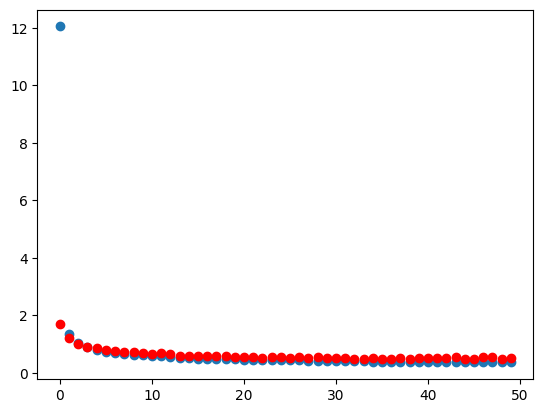

In [189]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

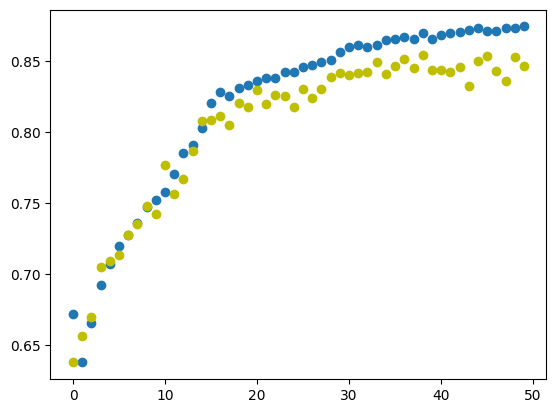

In [190]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [191]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5330622792243958
Test accuracy: 0.8331999778747559


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 54ms/step


array([[3.4073522e-04, 6.0094747e-04, 2.4575439e-01, 7.5479900e-03,
        6.1756253e-01, 4.2736414e-10, 1.2804353e-01, 4.0521580e-32,
        1.4999736e-04, 4.7665488e-24]], dtype=float32)

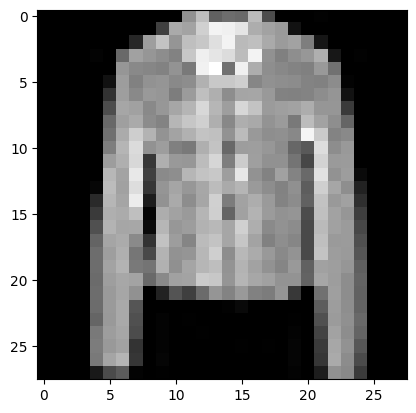

In [192]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = test_data[img_index].reshape(-1,784)

model.predict(picture)

#Opis:

batch_size = 128

epochs = 50

Zbiór treningowy  **60000** (20% to zbiór walidacyjny)

opt = keras.optimizers.Adam(learning_rate=0.001)

In [193]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                50240     
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Wnioski i komentarz


Model uczy się, mniewięcej do 35 epoki, poźniej następuje lekkie niewielkie przeuczeniem wykresy błędu (treningowego i walidacyjnego) się obijają

# **Regularyzacja** - metoda 3

Import normy L2:

In [194]:
from keras.regularizers import l2


Danie regularyzacji L2 do warstw:

Visulization

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


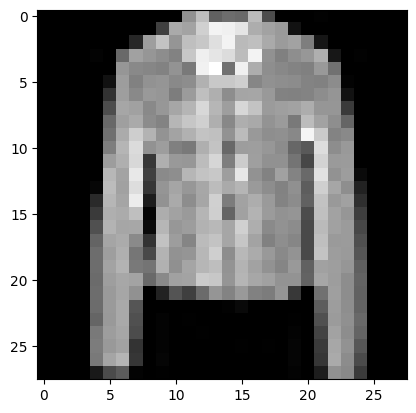

In [195]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [196]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [197]:
model = Sequential()
model.add(Dense(units = 128,kernel_regularizer=l2(0.01), use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10,kernel_regularizer=l2(0.01), use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [198]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 3s 5ms/step - loss: 11.0544 - accuracy: 0.7468 - val_loss: 6.0950 - val_accuracy: 0.7835
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 4.6912 - accuracy: 0.7949 - val_loss: 3.8637 - val_accuracy: 0.7991
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 3.3657 - accuracy: 0.8078 - val_loss: 2.9910 - val_accuracy: 0.7987
Epoch 4/50
375/375 [==============================] - 3s 9ms/step - loss: 2.5110 - accuracy: 0.8005 - val_loss: 2.2197 - val_accuracy: 0.7750
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 1.8971 - accuracy: 0.8067 - val_loss: 1.8154 - val_accuracy: 0.8069
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 1.6013 - accuracy: 0.8295 - val_loss: 1.5867 - val_accuracy: 0.8207
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 1.3967 - accuracy: 0.8384 - val_loss: 1.3991 - val_accuracy: 0.8266
Epoch

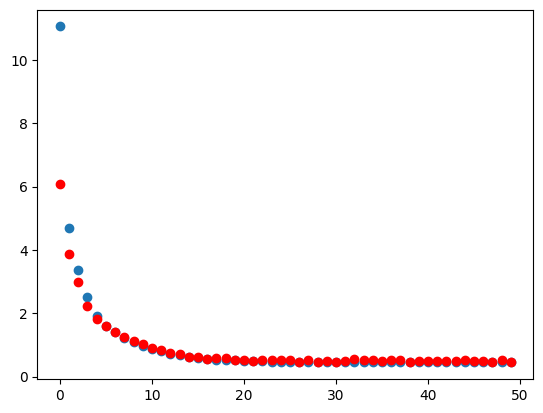

In [199]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

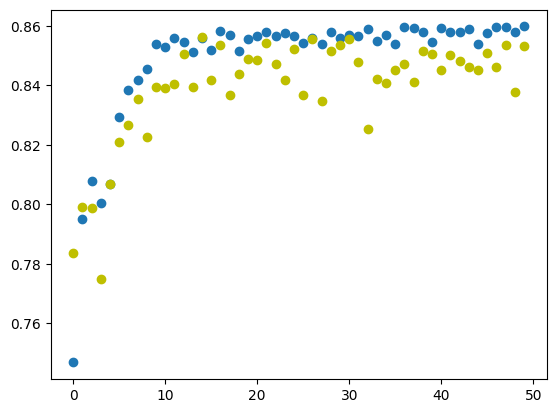

In [200]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [201]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5001400709152222
Test accuracy: 0.8482000231742859


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 53ms/step


array([[7.0416898e-04, 2.7944816e-07, 2.2078680e-01, 1.8817747e-03,
        7.0002413e-01, 1.7965411e-06, 7.4053541e-02, 1.0402940e-17,
        2.5475516e-03, 8.2536505e-16]], dtype=float32)

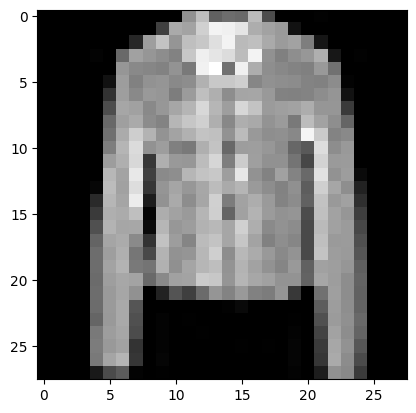

In [202]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = test_data[img_index].reshape(-1,784)

model.predict(picture)

#Opis:

batch_size = 128

epochs = 50

Zwiększony zbiór treningowy z **60000** do **68000** (20% to zbiór walidacyjny)

opt = keras.optimizers.Adam(learning_rate=0.001)

kernel_regularizer=l2(0.01) (we wszystkich warstwach)

In [203]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Wnioski i komentarz

Model uczy się do około 30 epoki potem się praktycznie nie uczy, ale się nie przeucza, wykresy błędu (treningowego i walidacyjnego)są podobne przy czym błędy cały czas spadają, ale od około 30 epoki spada bardzo wolno wręcz są stałe. Dokładność modelu dla danych treningowych i walidacyjnych praktycznie cały czas rośnie, ale po 30 epoce mniej.

# **Regularyzacja** - metoda 4

In [204]:
from keras.layers import Dropout

Visulization

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


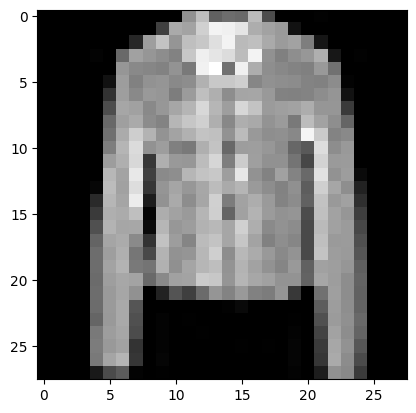

In [205]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [206]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [207]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [208]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 3s 6ms/step - loss: 5.2511 - accuracy: 0.4366 - val_loss: 1.2329 - val_accuracy: 0.6142
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 1.3757 - accuracy: 0.5263 - val_loss: 1.0405 - val_accuracy: 0.6683
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 1.2157 - accuracy: 0.5670 - val_loss: 0.9289 - val_accuracy: 0.6915
Epoch 4/50
375/375 [==============================] - 3s 8ms/step - loss: 1.1210 - accuracy: 0.5855 - val_loss: 0.9082 - val_accuracy: 0.6775
Epoch 5/50
375/375 [==============================] - 3s 7ms/step - loss: 1.0657 - accuracy: 0.5962 - val_loss: 0.8424 - val_accuracy: 0.6892
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 1.0139 - accuracy: 0.6119 - val_loss: 0.8199 - val_accuracy: 0.6992
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.9866 - accuracy: 0.6183 - val_loss: 0.7584 - val_accuracy: 0.7153
Epoch 

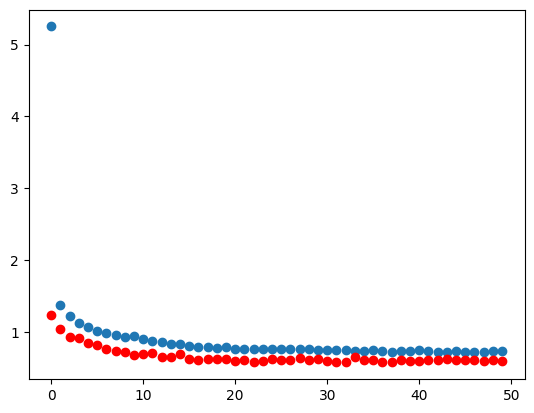

In [209]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

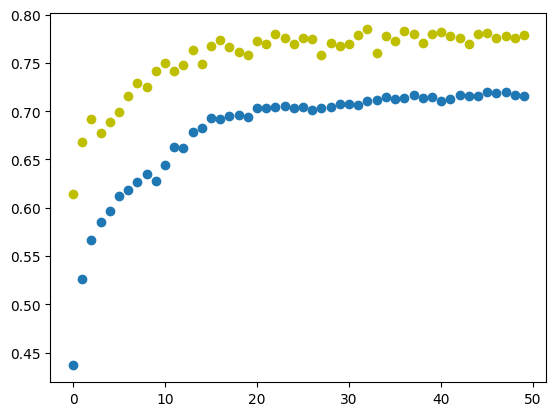

In [210]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [211]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6161739826202393
Test accuracy: 0.7731000185012817


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 50ms/step


array([[0.04613129, 0.00544799, 0.3449152 , 0.05428627, 0.32339495,
        0.00322585, 0.17669947, 0.00753833, 0.0344306 , 0.00392997]],
      dtype=float32)

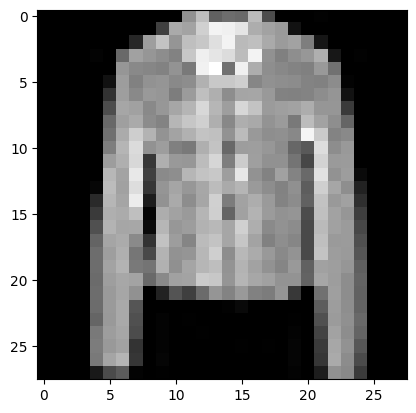

In [212]:
def plot_image(img_index):
    label_index = test_labels[img_index]
    plt.imshow(test_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = test_data[img_index].reshape(-1,784)

model.predict(picture)

#Opis:

batch_size = 128

epochs = 50

Zbiór treningowy **60000** (20% to zbiór walidacyjny)

opt = keras.optimizers.Adam(learning_rate=0.001)

model.add(Dropout(0.4))

In [213]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Wnioski i komentarz

Model uczy się do samego końca i się nie przeucza, wykresy błędu (treningowego i walidacyjnego)są podobne przy czym błędy cały czas spadają. Dokładność modelu dla danych treningowych i walidacyjnych praktycznie cały czas rośnie.

## Regularyzacja all in one #1



Zwiększamy zbiór treningowy z **60000** do **68000** (20% to zbiór walidacyjny)

In [214]:
test_data = data[:68000]
train_data = data[68000:]
test_labels = label[:68000]
train_labels = label[68000:]

In [215]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(68000, 28, 28) (2000, 28, 28) (68000,) (2000,)


One-hot coding

In [216]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [217]:
train_data.shape,train_labels.shape

((2000, 28, 28), (2000, 10))

In [218]:
test_data.shape,test_labels.shape

((68000, 28, 28), (68000, 10))

In [219]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


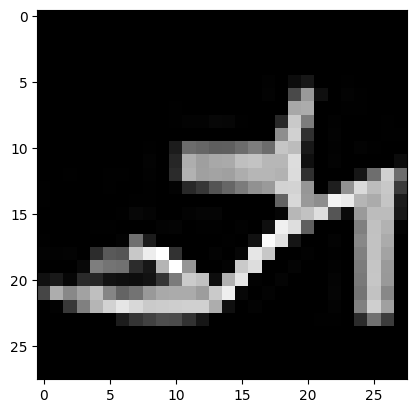

In [220]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [221]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

Danie **regularyzacji L2** do warstw:

Adding dropout layer

Resizing model

In [222]:
model = Sequential()
model.add(Dense(units = 64, kernel_regularizer=l2(0.01), use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(units = 10, kernel_regularizer=l2(0.01), use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                50240     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [223]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
13/13 [==============================] - 1s 21ms/step - loss: 94.5970 - accuracy: 0.2688 - val_loss: 9.1260 - val_accuracy: 0.4150
Epoch 2/50
13/13 [==============================] - 0s 7ms/step - loss: 6.7608 - accuracy: 0.2744 - val_loss: 3.7434 - val_accuracy: 0.3275
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 3.8201 - accuracy: 0.2325 - val_loss: 3.5108 - val_accuracy: 0.2750
Epoch 4/50
13/13 [==============================] - 0s 7ms/step - loss: 3.5522 - accuracy: 0.2200 - val_loss: 3.4397 - val_accuracy: 0.2750
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 3.4397 - accuracy: 0.2194 - val_loss: 3.3179 - val_accuracy: 0.3075
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 3.3405 - accuracy: 0.2350 - val_loss: 3.2609 - val_accuracy: 0.3200
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 3.2884 - accuracy: 0.2494 - val_loss: 3.1970 - val_accuracy: 0.3500
Epoch 8/50
13/13 [

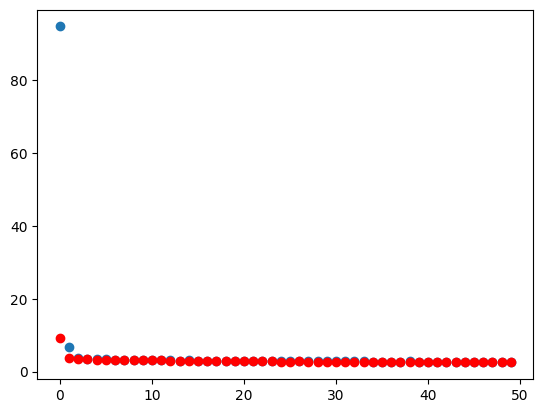

In [224]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

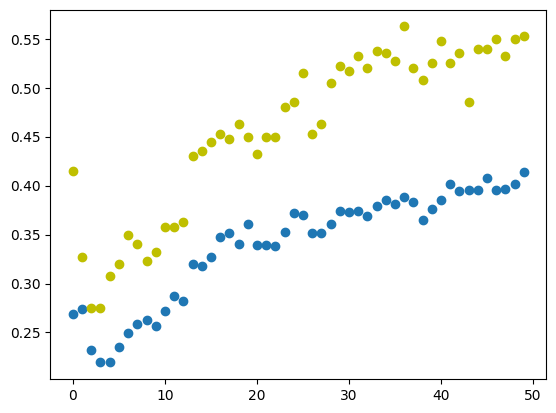

In [225]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [226]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.6748206615448
Test accuracy: 0.50688236951828


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
1/1 [==============================] - 0s 54ms/step


array([[1.66832937e-13, 1.38013626e-14, 2.98805759e-15, 1.05429781e-16,
        5.17348916e-22, 1.00000000e+00, 2.45318936e-14, 5.63692697e-16,
        7.48609855e-12, 3.32365185e-13]], dtype=float32)

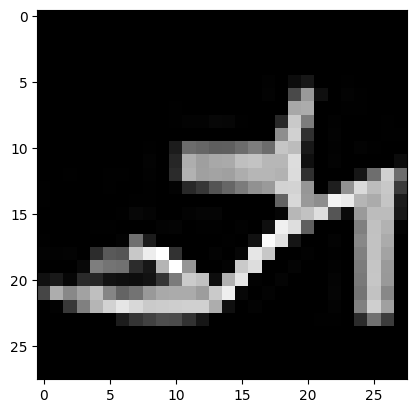

In [227]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

#Opis:

batch_size = 128

epochs = 50

Zbiór treningowy zwiększony z ***60000*** do **68000* (20% to zbiór walidacyjny)

opt = keras.optimizers.Adam(learning_rate=0.001)

kernel_regularizer=l2(0.01) we wszystkich warstwach

model.add(Dropout(0.4))

In [228]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                50240     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Wnioski i komentarz

Model uczy się do samego końca i się nie przeucza, wykresy błędu (treningowego i walidacyjnego)są podobne przy czym błędy cały czas, ale od 5 epoki dużo wolniej. Dokładność modelu dla danych treningowych i walidacyjnych praktycznie cały czas rośnie.

## Regularyzacja all in one #2




Zwiększamy zbiór treningowy z **60000** do **68000** (20% to zbiór walidacyjny)

In [229]:
test_data = data[:68000]
train_data = data[68000:]
test_labels = label[:68000]
train_labels = label[68000:]

In [230]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(68000, 28, 28) (2000, 28, 28) (68000,) (2000,)


One-hot coding

In [231]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [232]:
train_data.shape,train_labels.shape

((2000, 28, 28), (2000, 10))

In [233]:
test_data.shape,test_labels.shape

((68000, 28, 28), (68000, 10))

In [234]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


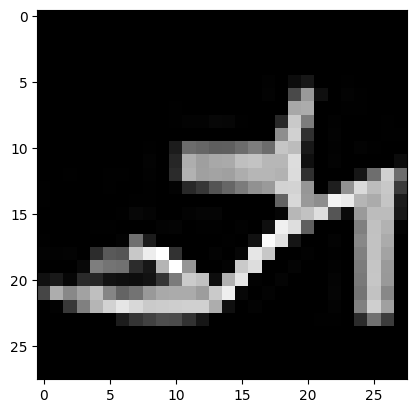

In [235]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [236]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

Danie **regularyzacji L2** do warstw:

Adding dropout layer

Resizing model

In [237]:
model = Sequential()
model.add(Dense(units = 64, kernel_regularizer=l2(0.01), use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(units = 10, kernel_regularizer=l2(0.01), use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                50240     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [238]:
batch_size = 128
epochs = 75

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/75
13/13 [==============================] - 1s 32ms/step - loss: 85.6006 - accuracy: 0.2338 - val_loss: 9.2193 - val_accuracy: 0.4525
Epoch 2/75
13/13 [==============================] - 0s 10ms/step - loss: 7.3124 - accuracy: 0.2663 - val_loss: 3.6942 - val_accuracy: 0.2800
Epoch 3/75
13/13 [==============================] - 0s 9ms/step - loss: 3.8152 - accuracy: 0.2225 - val_loss: 3.4587 - val_accuracy: 0.2600
Epoch 4/75
13/13 [==============================] - 0s 9ms/step - loss: 3.5680 - accuracy: 0.2237 - val_loss: 3.4359 - val_accuracy: 0.2575
Epoch 5/75
13/13 [==============================] - 0s 9ms/step - loss: 3.3771 - accuracy: 0.2362 - val_loss: 3.3627 - val_accuracy: 0.2875
Epoch 6/75
13/13 [==============================] - 0s 9ms/step - loss: 3.3437 - accuracy: 0.2619 - val_loss: 3.2901 - val_accuracy: 0.3175
Epoch 7/75
13/13 [==============================] - 0s 9ms/step - loss: 3.2729 - accuracy: 0.2819 - val_loss: 3.2078 - val_accuracy: 0.3375
Epoch 8/75
13/13 

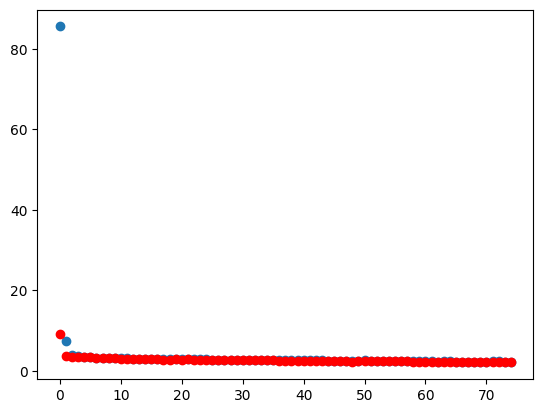

In [239]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

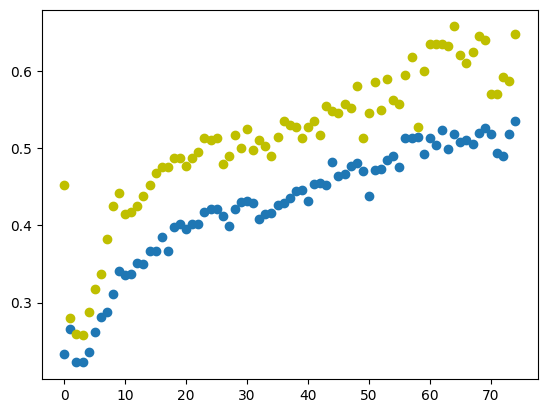

In [240]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [241]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.452636241912842
Test accuracy: 0.6238088011741638


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
1/1 [==============================] - 0s 51ms/step


array([[1.47238107e-11, 1.82209268e-25, 1.53627853e-23, 1.86553946e-15,
        1.00571526e-30, 9.99999881e-01, 2.51367218e-16, 5.36095533e-22,
        1.00579308e-13, 1.15462115e-07]], dtype=float32)

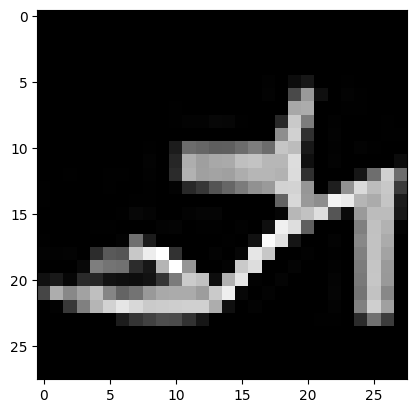

In [242]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

#Opis:

batch_size = 128

epochs = 75

Zbiór treningowy zwiększony z ***60000*** do **68000* (20% to zbiór walidacyjny)

opt = keras.optimizers.Adam(learning_rate=0.001)

kernel_regularizer=l2(0.01) we wszystkich warstwach

model.add(Dropout(0.4))

In [243]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                50240     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Wnioski i komentarz

Model uczy się do około 30 epoki potem deliktanie się przeucza, wykresy błędu (treningowego i walidacyjnego) są podobne przy czym po 30 epoce błąd validacyjny rośnie dalej, a błąd treningowy spada. Dokładność modelu dla danych treningowych i walidacyjnych praktycznie cały czas rośnie.

## Regularyzacja all in one #3




Zwiększamy zbiór treningowy z **60000** do **68000** (20% to zbiór walidacyjny)

In [244]:
test_data = data[:68000]
train_data = data[68000:]
test_labels = label[:68000]
train_labels = label[68000:]

In [245]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(68000, 28, 28) (2000, 28, 28) (68000,) (2000,)


One-hot coding

In [246]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [247]:
train_data.shape,train_labels.shape

((2000, 28, 28), (2000, 10))

In [248]:
test_data.shape,test_labels.shape

((68000, 28, 28), (68000, 10))

In [249]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


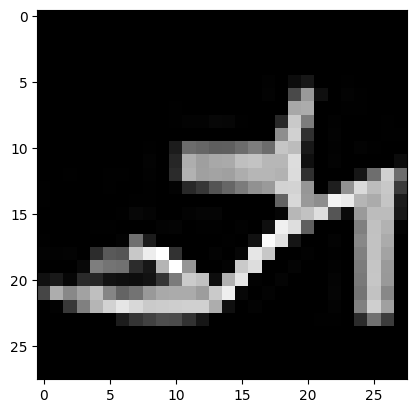

In [250]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [251]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

Danie **regularyzacji L2** do warstw:

Adding dropout layer

Resizing model

In [252]:
model = Sequential()
model.add(Dense(units = 64, kernel_regularizer=l2(0.01), use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(units = 10, kernel_regularizer=l2(0.01), use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.002)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 64)                50240     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [253]:
batch_size = 128
epochs = 100

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 1s 32ms/step - loss: 58.0449 - accuracy: 0.3594 - val_loss: 4.3284 - val_accuracy: 0.3775
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 4.1415 - accuracy: 0.2919 - val_loss: 3.3925 - val_accuracy: 0.2800
Epoch 3/100
13/13 [==============================] - 0s 10ms/step - loss: 3.4017 - accuracy: 0.2713 - val_loss: 3.1876 - val_accuracy: 0.3200
Epoch 4/100
13/13 [==============================] - 0s 10ms/step - loss: 3.2634 - accuracy: 0.3025 - val_loss: 3.0736 - val_accuracy: 0.3475
Epoch 5/100
13/13 [==============================] - 0s 11ms/step - loss: 3.1792 - accuracy: 0.3206 - val_loss: 2.9763 - val_accuracy: 0.3775
Epoch 6/100
13/13 [==============================] - 0s 11ms/step - loss: 3.1300 - accuracy: 0.3356 - val_loss: 3.0238 - val_accuracy: 0.3975
Epoch 7/100
13/13 [==============================] - 0s 11ms/step - loss: 3.0649 - accuracy: 0.3338 - val_loss: 2.9536 - val_accuracy: 0.3725
Epoch 

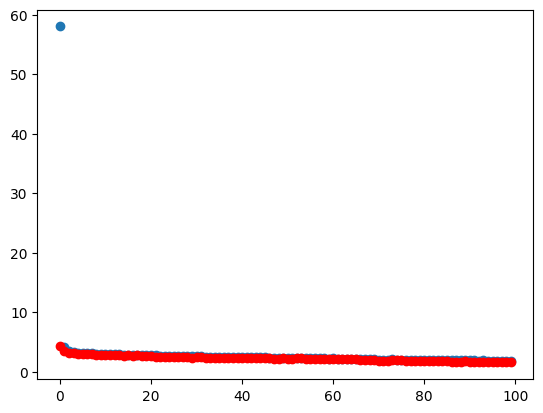

In [254]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

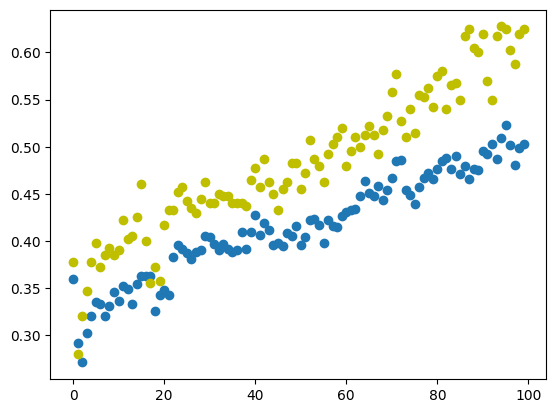

In [255]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [256]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.7682009935379028
Test accuracy: 0.5903382301330566


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
1/1 [==============================] - 0s 50ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 7.4471058e-27,
        8.8909479e-34, 3.1758628e-21]], dtype=float32)

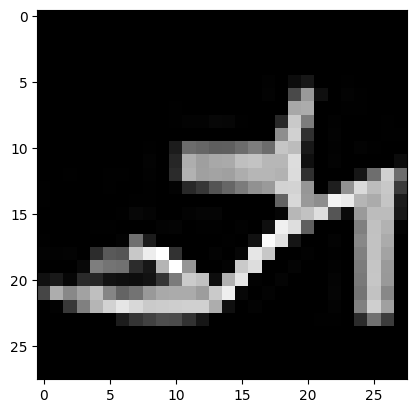

In [257]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

#Opis:

batch_size = 128

epochs = 100

Zbiór treningowy zwiększony z ***60000*** do **68000* (20% to zbiór walidacyjny)

opt = keras.optimizers.Adam(learning_rate=0.002)

kernel_regularizer=l2(0.01) we wszystkich warstwach

model.add(Dropout(0.3))

In [258]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 64)                50240     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Wnioski i komentarz

Model uczy się do około 4 epoki potem się przeucza, wykresy błędu (treningowego i walidacyjnego) są podobne przy czym po 5 epoce błąd validacyjny rośnie dalej, a błąd treningowy spada. Dokładność modelu dla danych treningowych i walidacyjnych praktycznie cały czas rośnie.

## Regularyzacja all in one #4




Zwiększamy zbiór treningowy z **60000** do **68000** (20% to zbiór walidacyjny)

In [314]:
test_data = data[:68000]
train_data = data[68000:]
test_labels = label[:68000]
train_labels = label[68000:]

In [315]:
print(test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(68000, 28, 28) (2000, 28, 28) (68000,) (2000,)


One-hot coding

In [316]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [317]:
train_data.shape,train_labels.shape

((2000, 28, 28), (2000, 10))

In [318]:
test_data.shape,test_labels.shape

((68000, 28, 28), (68000, 10))

In [319]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


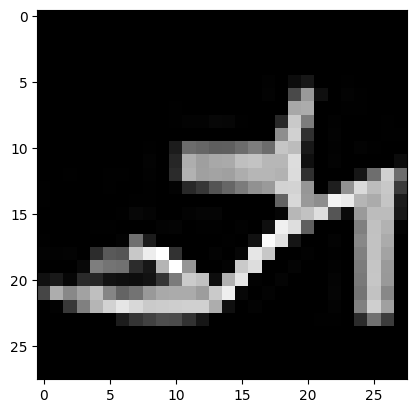

In [320]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [321]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

Danie **regularyzacji L2** do warstw:

Adding dropout layer

Zmiana learning_rate

Resizing model

In [322]:
model = Sequential()
model.add(Dense(units = 128, kernel_regularizer=l2(0.01), use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(units = 64, kernel_regularizer=l2(0.01), use_bias=True,  activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(units = 10, kernel_regularizer=l2(0.01), use_bias=True, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.009)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 128)               100480    
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_47 (Dense)            (None, 64)                8256      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_48 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [323]:
batch_size = 512
epochs = 400

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/400
4/4 [==============================] - 1s 82ms/step - loss: 556.0836 - accuracy: 0.1363 - val_loss: 213.8866 - val_accuracy: 0.0975
Epoch 2/400
4/4 [==============================] - 0s 17ms/step - loss: 193.1247 - accuracy: 0.1650 - val_loss: 35.4356 - val_accuracy: 0.2300
Epoch 3/400
4/4 [==============================] - 0s 18ms/step - loss: 63.3987 - accuracy: 0.2387 - val_loss: 11.3543 - val_accuracy: 0.3150
Epoch 4/400
4/4 [==============================] - 0s 17ms/step - loss: 32.8470 - accuracy: 0.2256 - val_loss: 7.4288 - val_accuracy: 0.1825
Epoch 5/400
4/4 [==============================] - 0s 17ms/step - loss: 17.0755 - accuracy: 0.1969 - val_loss: 7.0750 - val_accuracy: 0.1150
Epoch 6/400
4/4 [==============================] - 0s 17ms/step - loss: 11.1683 - accuracy: 0.1688 - val_loss: 7.0883 - val_accuracy: 0.1000
Epoch 7/400
4/4 [==============================] - 0s 18ms/step - loss: 9.0658 - accuracy: 0.1350 - val_loss: 7.1325 - val_accuracy: 0.0950
Epoch 8/

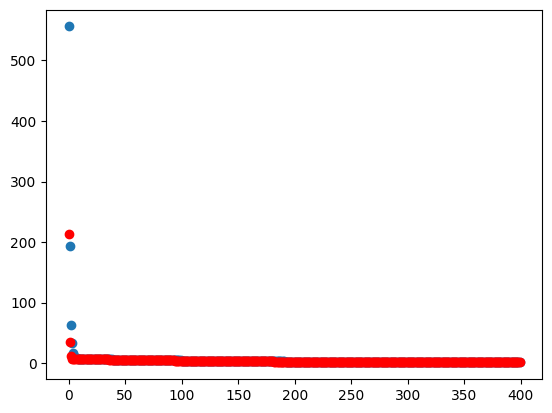

In [324]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

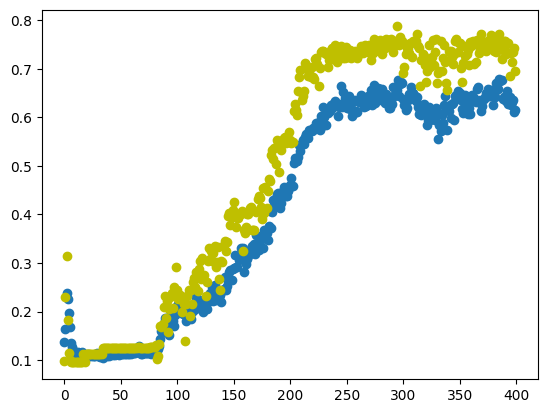

In [325]:
plt.scatter(np.arange(epochs),h.history['accuracy'])
plt.scatter(np.arange(epochs),h.history['val_accuracy'],c='y')
plt.show()

In [326]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.2562015056610107
Test accuracy: 0.6622205972671509


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
1/1 [==============================] - 0s 81ms/step


array([[1.0320659e-11, 3.7697907e-09, 4.9979179e-12, 3.7842198e-13,
        1.5816606e-10, 9.8172081e-01, 5.2237750e-12, 1.8074440e-02,
        7.1589340e-10, 2.0477077e-04]], dtype=float32)

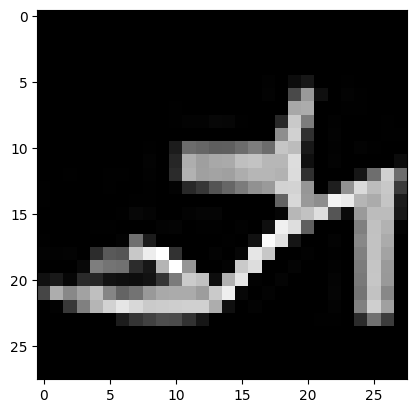

In [327]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

#Opis:

batch_size = 512

epochs = 400

Zbiór treningowy zwiększony z ***60000*** do **68000* (20% to zbiór walidacyjny)

opt = keras.optimizers.Adam(learning_rate=0.009)

kernel_regularizer=l2(0.01) we wszystkich warstwach

model.add(Dropout(0.4))

In [288]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 128)               100480    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_38 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_39 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Wnioski i komentarz

Model uczy się cały czas, przy czym po 20 epoce dużo wolniej, wykresy błędu (treningowego i walidacyjnego) są podobne przy czym po 20 epoce wykresy spadają wolniej. Dokładność modelu dla danych treningowych i walidacyjnych cały czas rośnie.